## Introduction
Aim of this project is to investigate the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) 
for the exponential distribution.

For the final project of the course "[Statiscal Inference](https://www.coursera.org/learn/statistical-inference)" 
from Coursera.

#### Simulation



We know the exponential distribution has a probability density function:

$$
X \sim\ Exp(\lambda) \\
f(x; \lambda) = 
\left\{\begin{matrix}
 \lambda\exp^{-\lambda x} &   x \geq 0\\
 0 & x < 0 \\
\end{matrix}\right.
$$

Calculating its mean and variance, we get: 


$$
\mu = 1/\lambda
,\sigma^2 = 1/\lambda
$$

In [2]:
options(warn = 0)
library(tidyverse)

In [3]:
lambda <- 0.2
nosim <- 1000
n <- 40

Now let's generate `r nosim` of random variables and plot it's histogram.
So we actually know the population mean is `r 1/lambda` and the population variance is `r 1/lambda`.
I'll also plot the original exponential distribution.

Warning message:
"geom_vline(): Ignoring `mapping` because `xintercept` was provided."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



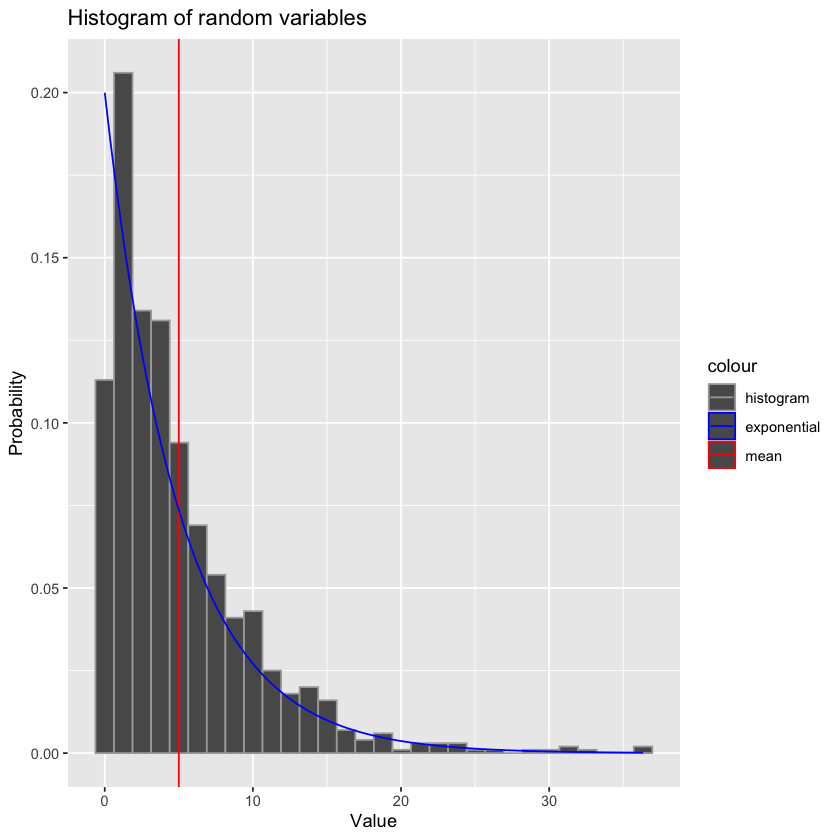

In [4]:
set.seed(1234)
df <- data.frame(value = rexp(nosim, lambda))

colors <- c("histogram" = "darkgray", "exponential" = "blue", "mean" = "red")
p <- ggplot() +
  geom_histogram(data = df, aes(x = value, y = ..count.. / nosim, color = "histogram")) +
  geom_vline(xintercept = 1 / lambda, aes(color = "mean"), color = "red") +
  stat_function(fun = dexp, args = list(rate = lambda), aes(color = "exponential")) +
  labs(title = "Histogram of random variables", x = "Value", y = "Probability") +
  scale_color_manual(values = colors)
print(p)


Now I'm going to run a 1000 simulations of 40 exponentially distributed random variables with $\lambda = 0.2$.


By the Central Limit Theorem, I'm expecting the sample mean to have a normal distribution:

$$
    \dfrac 
        {\overline{X}-\mu} 
        {\dfrac{\sigma}{\sqrt{n}}} 
    \sim\ 
    \mathcal{N}(0,1)
    \to
    \\
    \overline{X} 
    \sim\ 
    \mathcal{N}(\dfrac{1}{\lambda},\dfrac{1}{\lambda\sqrt{n}})
    % = 
    % \mathcal{N}(r 1/lambda,r 1/(lambda*sqrt(n)))
$$

Warning message:
"geom_vline(): Ignoring `mapping` because `xintercept` was provided."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



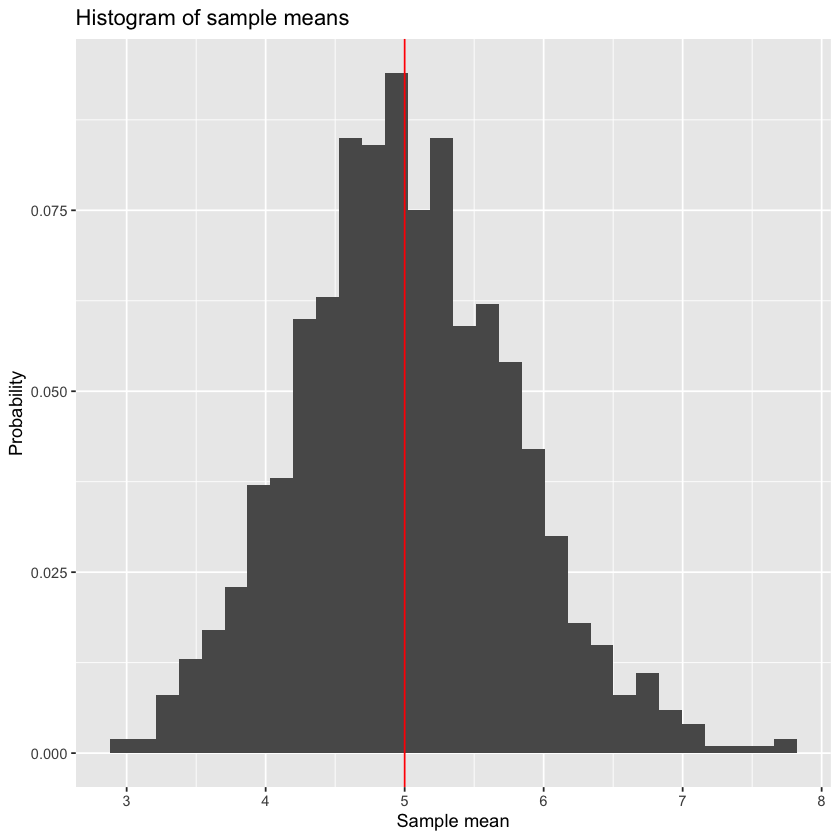

In [5]:
set.seed(123)
means <- NULL
vars <- NULL
for (i in 1:nosim) {
  sample_i <- rexp(n, rate = lambda)
  means[i] <- mean(sample_i)
  vars[i] <- sd(sample_i)^2
}
p <- ggplot() +
  geom_histogram(data = data.frame(means), aes(x = means, y = ..count.. / nosim)) +
  geom_vline(xintercept = (1 / lambda), aes(color = "mean"), color = "red") +
  labs(title = "Histogram of sample means", y = "Probability", x = "Sample mean")
print(p)

And as we expected, sample mean looks like a normal distribution.

And for the variances of the samples:

$$
  \dfrac{n-1}{\sigma^2}S^2
  \sim
  \chi^2 _{n-1}
$$

So we will be expecting a chi-squared distribution.

Warning message:
"geom_vline(): Ignoring `mapping` because `xintercept` was provided."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



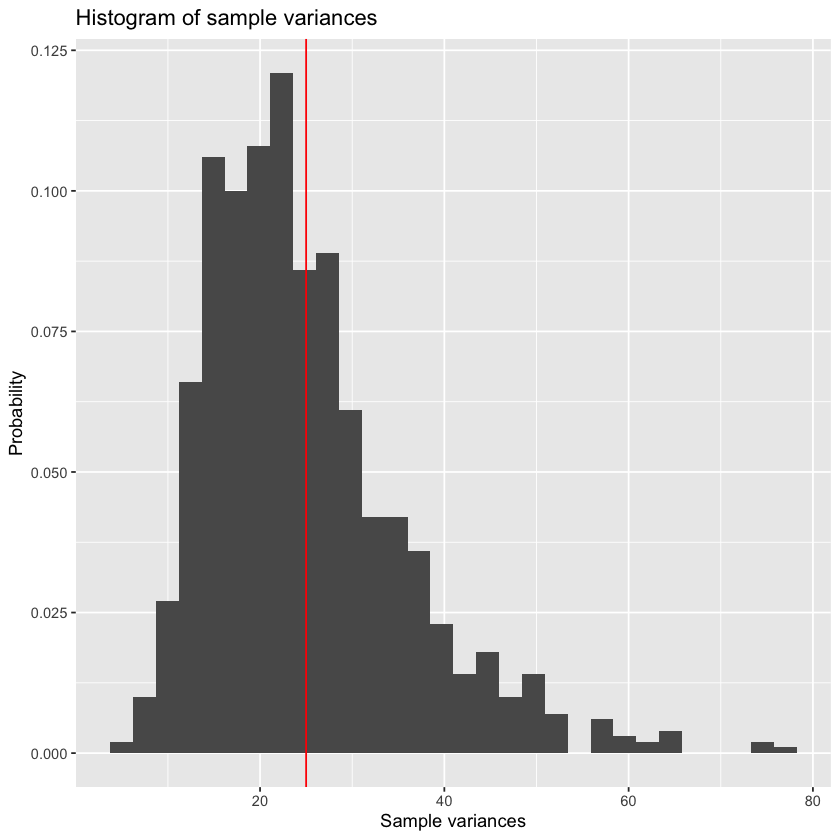

In [6]:
p <- ggplot() +
  geom_histogram(data = data.frame(vars), aes(x = vars, y = ..count.. / nosim)) +
  geom_vline(xintercept = (1 / lambda)^2, aes(color = "mean"), color = "red") +
  # stat_function(fun = function(x) { (n - 1) * lambda * dchisq(x, df = n - 1) }) +
  labs(title = "Histogram of sample variances", y = "Probability", x = "Sample variances")
print(p)